<img width=700px; src="../logo_cds.png">

# Introduction to numpy

This material is inspired from different source:

* https://github.com/SciTools/courses
* https://github.com/paris-saclay-cds/python-workshop/blob/master/Day_1_Scientific_Python/01-numpy-introduction.ipynb

### Difference between python list and numpy array

Python offers some data containers to store data. Lists are generally used since they allow for flexibility.

In [1]:
x = [i for i in range(10)]
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

At a first glance, numpy array seems to offer the same capabilities.

In [2]:
import numpy as np

In [3]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

To find the difference, we need to focus on the low-level implementation of these two containers.

A python list is a contiguous array in memory containing the references to the stored object. It allows for instance to store different data type object within the same list.

In [4]:
x = [1, 2.0, 'three']
x

[1, 2.0, 'three']

In [5]:
print('The type of x is: {}'.format(x))
for idx, elt in enumerate(x):
    print('The type of the {}-ith element is" {}'.format(idx, type(elt)))

The type of x is: [1, 2.0, 'three']
The type of the 0-ith element is" <class 'int'>
The type of the 1-ith element is" <class 'float'>
The type of the 2-ith element is" <class 'str'>


Numpy arrays, however, are directly storing the typed-data. Therefore, they are not meant to be used with mix type.

In [6]:
x = np.arange(3)
print('The type of x is: {}'.format(type(x)))
print('The data type of x is: {}'.format(x.dtype))

The type of x is: <class 'numpy.ndarray'>
The data type of x is: int64


### Create numpy array

Try out some of these ways of creating NumPy arrays. See if you can produce:

* a NumPy array from a list of numbers,
* a 3-dimensional NumPy array filled with a constant value -- either 0 or 1,
* a NumPy array filled with a constant value -- not 0 or 1. (Hint: this can be achieved using the last array you created, or you could use np.empty and find a way of filling the array with a constant value),
* a NumPy array of 8 elements with a range of values starting from 0 and a spacing of 3 between each element, and
* a NumPy array of 10 elements that are logarithmically spaced.


In [7]:
x = np.array([1, 2, 3])
x

array([1, 2, 3])

In [8]:
x = np.ones((2, 2, 2))
x

array([[[1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.]]])

In [9]:
x *= 5
x

array([[[5., 5.],
        [5., 5.]],

       [[5., 5.],
        [5., 5.]]])

In [10]:
x = np.ones((2, 2, 2)) * 5
x

array([[[5., 5.],
        [5., 5.]],

       [[5., 5.],
        [5., 5.]]])

In [11]:
x = np.empty((2, 2, 2))
print(x)
x[...] = 9
x

[[[5. 5.]
  [5. 5.]]

 [[5. 5.]
  [5. 5.]]]


array([[[9., 9.],
        [9., 9.]],

       [[9., 9.],
        [9., 9.]]])

In [12]:
x[:, :, :] = 10
x

array([[[10., 10.],
        [10., 10.]],

       [[10., 10.],
        [10., 10.]]])

In [13]:
x = np.arange(0, 3 * 8, 3)
x

array([ 0,  3,  6,  9, 12, 15, 18, 21])

In [14]:
x = np.logspace(0, 1, num=10)
x

array([ 1.        ,  1.29154967,  1.66810054,  2.15443469,  2.7825594 ,
        3.59381366,  4.64158883,  5.9948425 ,  7.74263683, 10.        ])

How could you change the shape of the 8-element array you created previously to have shape (2, 2, 2)? Hint: this can be done without creating a new array.

In [15]:
x = np.arange(8)
x

array([0, 1, 2, 3, 4, 5, 6, 7])

In [16]:
x.reshape((2, 2, 2))

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

### Indexing

Note that the NumPy arrays are zero-indexed:

In [17]:
data = np.random.randn(10000, 5)

In [18]:
data[0, 0]

-0.08132702268232626

It means that that the third element in the first row has an index of [0, 2]:

In [19]:
data[0, 2]

1.2724298595412566

We can also assign the element with a new value:

In [20]:
data[0, 2] = 100.
print(data[0, 2])

100.0


NumPy (and Python in general) checks the bounds of the array:

In [21]:
print(data.shape)
data[60, 10]

(10000, 5)


IndexError: index 10 is out of bounds for axis 1 with size 5

Finally, we can ask for several elements at once:

In [22]:
data[0, [0, 3]]

array([-0.08132702, -1.09055622])

You can even pass a negative index. It will go from the end of the array.

In [23]:
data[-1, -1]

-0.454906523922135

In [24]:
data[data.shape[0] - 1, data.shape[1] - 1]

-0.454906523922135

### Slices

You can select ranges of elements using slices. To select first two columns from the first row, you can use:

In [25]:
data[0, 0:2]

array([-0.08132702, -1.98069255])

Note that the returned array does not include third column (with index 2).

You can skip the first or last index (which means, take the values from the beginning or to the end):

In [26]:
data[0, :2]

array([-0.08132702, -1.98069255])

If you omit both indices in the slice leaving out only the colon (:), you will get all columns of this row:

In [27]:
data[0, :]

array([-8.13270227e-02, -1.98069255e+00,  1.00000000e+02, -1.09055622e+00,
        1.93917583e+00])

### Filtering data

In [28]:
data

array([[-8.13270227e-02, -1.98069255e+00,  1.00000000e+02,
        -1.09055622e+00,  1.93917583e+00],
       [ 2.83983502e-01, -5.88899180e-01, -1.08568283e+00,
         9.84910443e-01, -1.01478765e-01],
       [ 6.56546514e-02,  1.92029377e-01, -5.66876543e-01,
         7.17270032e-01, -1.57349865e+00],
       ...,
       [-1.48875317e+00,  1.36000612e+00, -5.24095340e-02,
        -2.01434344e-01, -7.79935175e-02],
       [ 9.84720335e-01, -1.32389381e+00, -5.70135316e-01,
         1.99504546e-01, -6.89925502e-01],
       [-7.62318898e-02,  1.60750123e+00,  3.27054878e-01,
         4.51632811e-01, -4.54906524e-01]])

We can produce a boolean array when using comparison operators.

In [29]:
data > 0

array([[False, False,  True, False,  True],
       [ True, False, False,  True, False],
       [ True,  True, False,  True, False],
       ...,
       [False,  True, False, False, False],
       [ True, False, False,  True, False],
       [False,  True,  True,  True, False]])

This mask can be used to select some specific data.

In [30]:
data[data > 0]

array([100.        ,   1.93917583,   0.2839835 , ...,   1.60750123,
         0.32705488,   0.45163281])

It can also be used to affect some new values

In [31]:
data[data > 0] = np.inf
data

array([[-0.08132702, -1.98069255,         inf, -1.09055622,         inf],
       [        inf, -0.58889918, -1.08568283,         inf, -0.10147876],
       [        inf,         inf, -0.56687654,         inf, -1.57349865],
       ...,
       [-1.48875317,         inf, -0.05240953, -0.20143434, -0.07799352],
       [        inf, -1.32389381, -0.57013532,         inf, -0.6899255 ],
       [-0.07623189,         inf,         inf,         inf, -0.45490652]])

Answer the following quizz:

* Print the element in the $1^{st}$ row and $10^{th}$ cloumn of the data.
* Print the elements in the $3^{rd}$ row and columns of $3^{rd}$ and $15^{th}$.
* Print the elements in the $4^{th}$ row and columns from $3^{rd}$ t0 $15^{th}$.
* Print all the elements in column $15$ which their value is above 0.

In [32]:
data = np.random.randn(20, 20)

In [33]:
data[0, 9]

0.6529138803447789

In [34]:
data[2, [2, 14]]

array([0.66515239, 0.14031021])

In [35]:
data[3, 2:15]

array([-2.11294964, -0.57307469,  0.46439587, -0.26358502,  0.84391946,
       -1.98356733, -3.08046592,  1.13553818, -1.23978368, -1.49197707,
       -2.12300313,  1.43175373, -0.91972511])

In [36]:
data[data[:, 15] > 0, 15]

array([1.41960809, 1.27840098, 0.36925738, 0.095759  , 0.87680405,
       0.40121943, 0.11250155, 0.70322598, 0.50978188, 0.62297046,
       1.37656749])

### Broadcasting

Broadcasting applies these three rules:

* If the two arrays differ in their number of dimensions, the shape of the array with fewer dimensions is padded with ones on its leading (left) side.

* If the shape of the two arrays does not match in any dimension, either array with shape equal to 1 in a given dimension is stretched to match the other shape.

* If in any dimension the sizes disagree and neither has shape equal to 1, an error is raised.

Note that all of this happens without ever actually creating the expanded arrays in memory! This broadcasting behavior is in practice enormously powerful, especially given that when NumPy broadcasts to create new dimensions or to 'stretch' existing ones, it doesn't actually duplicate the data. In the example above the operation is carried out as if the scalar 1.5 was a 1D array with 1.5 in all of its entries, but no actual array is ever created. This can save lots of memory in cases when the arrays in question are large. As such this can have significant performance implications.

<img src="broadcasting.png">

Replicate the above exercises. In addition, how would you make the matrix multiplication between 2 matrices.

In [37]:
X = np.random.random((1, 3))
Y = np.random.random((3, 5))

In [38]:
X * Y

ValueError: operands could not be broadcast together with shapes (1,3) (3,5) 

In [39]:
xx = np.dot(X, Y)
xx

array([[0.61185004, 0.41006318, 0.53700563, 0.48526757, 0.58896413]])

In [40]:
xx.shape

(1, 5)

In [41]:
xx = X @ Y
xx

array([[0.61185004, 0.41006318, 0.53700563, 0.48526757, 0.58896413]])

In [42]:
xx.shape

(1, 5)

### Views on Arrays

NumPy attempts to not make copies of arrays. Many NumPy operations will produce a reference to an existing array, known as a "view", instead of making a whole new array. For example, indexing and reshaping provide a view of the same memory wherever possible.


In [43]:
arr = np.arange(8)
arr_view = arr.reshape(2, 4)

# Print the "view" array from reshape.
print('Before\n', arr_view)

# Update the first element of the original array.
arr[0] = 1000

# Print the "view" array from reshape again,
# noticing the first value has changed.
print('After\n', arr_view)

Before
 [[0 1 2 3]
 [4 5 6 7]]
After
 [[1000    1    2    3]
 [   4    5    6    7]]


What this means is that if one array (`arr`) is modified, the other (`arr_view`) will also be updated : the same memory is being shared. This is a valuable tool which enables the system memory overhead to be managed, which is particularly useful when handling lots of large arrays. The lack of copying allows for very efficient vectorized operations.

Remember, this behaviour is automatic in most of NumPy, so it requires some consideration in your code, it can lead to some bugs that are hard to track down. For example, if you are changing some elements of an array that you are using elsewhere, you may want to explicitly copy that array before making changes. If in doubt, you can always copy the data to a different block of memory with the copy() method.

For example:

In [44]:
arr = np.arange(8)
arr_view = arr.reshape(2, 4).copy()

# Print the "view" array from reshape.
print('Before\n', arr_view)

# Update the first element of the original array.
arr[0] = 1000

# Print the "view" array from reshape again,
# noticing the first value has changed.
print('After\n', arr_view)

Before
 [[0 1 2 3]
 [4 5 6 7]]
After
 [[0 1 2 3]
 [4 5 6 7]]


### Final exercise

In [45]:
def trapz_slow(x, y):
    area = 0.
    for i in range(1, len(x)):
        area += (x[i] - x[i-1]) * (y[i] + y[i-1])
    return area / 2

#### Part 1

Create two arrays $x$
and $y$, where $x$ is a linearly spaced array in the interval $[0,3]$ of length 3000, and y represents the function $f(x)=x^2$ sampled at $x$

#### Part 2

Use indexing (not a for loop) to find the 10 values representing $y_i+y_{i−1}$
for i between 1 and 11.

Hint: What indexing would be needed to get all but the last element of the 1d array `y`. Similarly what indexing would be needed to get all but the first element of a 1d array.

#### Part 3

Write a function `trapz(x, y)`, that applies the trapezoid formula to pre-computed values, where x and y are 1-d arrays. The function should not use a for loop.

#### Part 4

Verify that your function is correct by using the arrays created in #1 as input to trapz. Your answer should be a close approximation of $\sum 30 x^2$ which is 9

#### Part 5 (extension)

`numpy` and `scipy.integrate` provide many common integration schemes. Find the documentation for NumPy's own version of the trapezoidal integration scheme and check its result with your own.

In [46]:
x = np.linspace(0, 3, 3000)
x

array([0.00000000e+00, 1.00033344e-03, 2.00066689e-03, ...,
       2.99799933e+00, 2.99899967e+00, 3.00000000e+00])

In [47]:
y = x ** 2
y

array([0.000000e+00, 1.000667e-06, 4.002668e-06, ..., 8.988000e+00,
       8.993999e+00, 9.000000e+00])

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

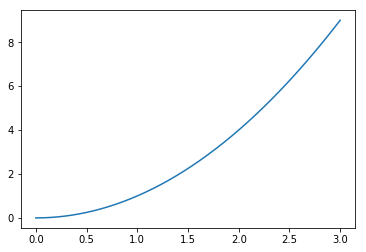

In [49]:
plt.plot(x, y)

In [50]:
%%timeit
trapz_slow(x, y)

1.48 ms ± 39.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [51]:
trapz_slow(x, y)

9.000000500333512

In [52]:
def trapz(x, y):
    return np.sum((x[1:] - x[:-1]) * (y[1:] + y[:-1])) / 2

In [53]:
%%timeit
trapz(x, y)

10.7 µs ± 58.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [54]:
trapz(x, y)

9.0000005003335

In [55]:
from scipy.integrate import trapz

In [56]:
trapz(y, x)

9.0000005003335

In [57]:
%%timeit
trapz(y, x)

16.8 µs ± 93 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
